# DataSet Cleaning

In [1739]:
import pandas as pd
import numpy as np
import datetime as dt

In [1740]:
pd.set_option('display.max_rows', 100)

In [1741]:
print(open('data/attacks.csv')) #specify encoding in read_csv method

<_io.TextIOWrapper name='data/attacks.csv' mode='r' encoding='cp1252'>


In [1742]:
df = pd.read_csv('data/attacks.csv' , encoding = 'cp1252')

In [1743]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [1744]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

## Unnamed columns / Not relevant for analysis

In [1745]:
df.drop(labels = ["pdf","href formula","href","Name","Location"], axis = 1, inplace=True)


In [1746]:
df[df["Unnamed: 22"].notnull()]

,Case Number,Date,Year,Type,Country,Area,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,Surfing,M,31,"No injury, shark bumped surfboard",N,16h00,NaN,R. Collier,2006.05.27,2006.05.27,4825.0,stopped here,NaN


In [1747]:
df[df["Unnamed: 23"].notnull()]

,Case Number,Date,Year,Type,Country,Area,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,Went to aid of child being menaced by the shark,M,NaN,"Buttock bitten, tissue removed",N,NaN,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30,1952.03.30,1888.0,NaN,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,Fishing,M,NaN,Leg bitten by netted shark PROVOKED INCIDENT,N,NaN,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R,1878.09.14.R,463.0,NaN,change filename


In [1748]:
# unnamed columns don't add any value to the analysis, dropped.
df.drop(labels=["Unnamed: 23","Unnamed: 22"], axis=1,inplace=True)

## Case Number

#### not dopping case number yet, might be useful to extract dates

In [1749]:
#df[["Case Number","Case Number.1","Case Number.2"]]

df["Case Number"].replace(["0",0,"xx"],np.nan,inplace=True)


df.drop("original order", axis = 1, inplace=True) # original order doesn't add value
df.dropna(axis = 0, how= "all", inplace=True)
#df.drop(["original order","Case Number.1","Case Number.2"]) # original order not useful




In [1750]:




df[["Case Number","Case Number.1"]][df["Case Number"] != df["Case Number.1"]]






,Case Number,Case Number.1
34,2018.04.03,2018.04.02
117,2017.07.20.a,2017/07.20.a
144,2017.05.06,2017.06.06
217,2016.09.15,2016.09.16
314,2016.01.24.b,2015.01.24.b
334,2015.12.23,2015.11.07
339,2015.10.28.a,2015.10.28
390,2015.07-10,2015.07.10
560,2014.05.04,2013.05.04
3522,1967.07.05,1967/07.05


In [1751]:
df[["Case Number","Case Number.2"]][df["Case Number"] != df["Case Number.2"]]

,Case Number,Case Number.2
390,2015.07-10,2015.07.10
4949,1934.01.08.R,1934.02.08.R
5488,NaN,1905.09.06.R
5944,1864.05,1864.05.00


## Dates

In [1752]:
df["date_fix"] = df["Case Number"].str.extract(r"(\d{4}.\d{2}.\d{2})")
df["date_fix"] = df["date_fix"].str[:8] + df["date_fix"].str[-2:].apply(lambda x: "01" if (x == "00") else x) # adding date to incomplete values
df["date_fix"] = df["date_fix"].str.replace(".","-")
df['Year'] = df["date_fix"].str[:4].fillna(0)
df["Month"] = df["date_fix"].str[5:7].fillna(0)
df["Day"] = df["date_fix"].str[8:10].fillna(0)



df["Month"].value_counts(normalize = True) #removing nulls and invalid values, representing only 2% of the obs
df["Year"].value_counts(normalize = True) #removing nulls and invalid values, representing only 2% of the obs

#df.drop(["Case Number","Case Number.1","Case Number.2","Date"], axis= 1,inplace=True)
#df["date_clean"] = pd.to_datetime(df["date_fix"], format="%Y.%m.%d")






C:\Users\Sofia\AppData\Local\Temp\ipykernel_24944\3366258202.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["date_fix"] = df["date_fix"].str.replace(".","-")


2015    0.022691
2017    0.021739
2016    0.020628
2011    0.020311
2014    0.020152
          ...   
1787    0.000159
1786    0.000159
1785    0.000159
1784    0.000159
0005    0.000159
Name: Year, Length: 250, dtype: float64

In [1753]:
df = df[((df["Year"].astype(int)>1800))&((df["Year"].astype(int)<2018))&(df["Month"].astype(int)>=1)&(df["Month"].astype(int)<13)] # date filtering
df["date_fix"] = df['Year'] +"-"+ df["Month"] +"-"+ df["Day"]
df["date_clean"] = pd.to_datetime(df["date_fix"], format="%Y.%m.%d",errors="coerce")




## Age

In [1754]:
df["Age_clean"] = df["Age"].str.extract(r"(\b\d{2}\b)").astype(float)


## Type (ok)

In [1755]:
df["Type"] = df["Type"].str.replace(r"(^Boat.*)","Boat")
df["Type"] = df["Type"].str.replace("Questionable","Invalid") # unify all boat classes
df["Type"].value_counts(normalize=True, dropna=False)

C:\Users\Sofia\AppData\Local\Temp\ipykernel_24944\2310183030.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Type"] = df["Type"].str.replace(r"(^Boat.*)","Boat")


Unprovoked      0.724259
Provoked        0.094194
Invalid         0.088230
Boat            0.054201
Sea Disaster    0.038414
NaN             0.000702
Name: Type, dtype: float64

## Country                 

In [1756]:
df["Country"].value_counts()

USA                      2116
AUSTRALIA                1250
SOUTH AFRICA              540
NEW ZEALAND               119
BRAZIL                    107
                         ... 
SUDAN?                      1
THE BALKANS                 1
BANGLADESH                  1
NORTH ATLANTIC OCEAN        1
GHANA                       1
Name: Country, Length: 188, dtype: int64

## Fatal (ok)

In [1757]:


df["Fatal (Y/N)"] = df["Fatal (Y/N)"].str.replace(r'\b[Yy]\b', "Y" , regex= True).str.replace(r'(\b[Nn]\b\s+)', "N" , regex= True).str.replace(r'(\s+\b[Nn]\b)', "N" , regex= True)

fatal_list = ['N', 'Y', 'UNKNOWN']
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].apply(lambda x:'UNKNOWN' if (x not in fatal_list) else x )
df["Fatal (Y/N)"].value_counts()

#df["Fatal (Y/N)"] = df["Fatal (Y/N)"].apply(lambda x: x.replace(x,"N") if (x.contains(['N',"n"], regex=False)) and (x != "UNKNOWN") else x) # unify all boat classes


N          3976
Y          1177
UNKNOWN     548
Name: Fatal (Y/N), dtype: int64

## Species (ok)

In [1758]:

species_pattern = r"((\b\w{3,}\b\s){0,2}shark)"
df["Species "] = df["Species "].str.lower()
df["Species_clean_1"] = df["Species "].str.extract(species_pattern )[0]

# segmentate only species with more than 1% occurences, group Na and low occurence species in Others
species_vc = df[["Species_clean_1"]].value_counts(normalize=True, dropna=False)
species_vc_ind = species_vc[species_vc>0.009].index
df["Species_clean_2"] = df["Species_clean_1"].apply(lambda x: x if (x in species_vc_ind) else "shark").replace([np.nan,"shark"],"other/NA")
df.drop("Species ", axis = 1 , inplace=True)





In [1759]:
df[df["Species_clean_1"].isnull()]

,Case Number,Date,Year,Type,Country,Area,Activity,Sex,Age,Injury,...,Investigator or Source,Case Number.1,Case Number.2,date_fix,Month,Day,date_clean,Age_clean,Species_clean_1,Species_clean_2
54,2017.12.30,30-Dec-2017,2017,Unprovoked,USA,California,Surfing,F,35,Foot bitten,...,R. Collier,2017.12.30,2017.12.30,2017-12-30,12,30,2017-12-30,35.0,NaN,other/NA
61,2017.11.18,18-Nov-2017,2017,Unprovoked,USA,Florida,Surfing,F,14,Heel bitten,...,"Florida Today, 11/21/2017",2017.11.18,2017.11.18,2017-11-18,11,18,2017-11-18,14.0,NaN,other/NA
62,2017.11.13.R,Reported 13-Nov-2017,2017,Unprovoked,NaN,NaN,Surfing,M,24,Puncture wounds to feet,...,Instagram,2017.11.13.R,2017.11.13.R,2017-11-13,11,13,2017-11-13,24.0,NaN,other/NA
67,2017.10.26,26-Oct-2017,2017,Unprovoked,USA,Hawaii,Stand-Up Paddleboarding,M,NaN,No injury but shark bit SUP,...,"Hawaii News Now, 10/27/2017",2017.10.26,2017.10.26,2017-10-26,10,26,2017-10-26,NaN,NaN,other/NA
68,2017.10.23.c,23-Oct-2017,2017,Unprovoked,MAURITIUS,Pamplemousses,Swimming,M,NaN,Minor injury to foot,...,"J. LeBlanc, GSAF",2017.10.23.c,2017.10.23.c,2017-10-23,10,23,2017-10-23,NaN,NaN,other/NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6125,1806.04.24,Aug-24-1806,1806,Sea Disaster,USA,NaN,NaN,M,NaN,Shark scavenged on the dead sailors,...,"Evening Post, 9/6/1806",1806.04.24,1806.04.24,1806-04-24,04,24,1806-04-24,NaN,NaN,other/NA
6127,1804.02.26.R,Reported 26-Feb-1804,1804,Boat,AUSTRALIA,New South Wales,NaN,NaN,NaN,No injury to occupants,...,"Sydney Gazette, 2/26/1804",1804.02.26.R,1804.02.26.R,1804-02-26,02,26,1804-02-26,NaN,NaN,other/NA
6128,1803.05.17,May-17-1803,1803,Sea Disaster,USA,South Carolina,NaN,M,NaN,No injury,...,"Evening Post, 6/13/1803",1803.05.17,1803.05.17,1803-05-17,05,17,1803-05-17,NaN,NaN,other/NA
6129,1803.03.00,Mar-1803,1803,Unprovoked,AUSTRALIA,Western Australia,NaN,M,NaN,Shark knocked him down & tore clothing of the ...,...,F. Peron ref in G.P. Whitley (Fishes of Austr...,1803.03.00,1803.03.00,1803-03-01,03,01,1803-03-01,NaN,NaN,other/NA


## Sex (ok)

In [1760]:
df["Sex "].unique()
df["Sex "] = df["Sex "].str.replace(r'\b[Ff]\b', "F" , regex= True).str.replace(r'(\b[Mm]\b\s+)', "M" , regex= True)
sex_lst = ["M","F"]
df["Sex "] = df["Sex "].apply(lambda x: x if (x in sex_lst) else np.nan)
df["Sex "].value_counts(dropna=False, normalize=True)

M      0.807928
F      0.103491
NaN    0.088581
Name: Sex , dtype: float64

## Time

In [1761]:
time_pattern = r"((?<!\d)\d{2}(?!\d)|Afternoon|Evening|Night|morning|dusk|A.M.|P.M.)"

df["Time_extract"] = df["Time"].str.extract(time_pattern)
am_list =['morning']
pm_list =['Afternoon',  'Night',  'Evening',  'dusk']
df["Time_extract"] = df["Time_extract"].replace(am_list,"A.M.").replace(pm_list,"P.M.")

#Creating auxiliary series to define AM,PM intervals
df["Time_number"] = pd.to_numeric(df["Time_extract"], errors="coerce")
df["Time_number"].fillna(99, inplace=True) 

# Convertinng 
def time_str(x):
    if (x>=0 and x<=12):
        return  "A.M."
    elif (x>12 and x<=24):
        return "P.M."
    else:
        return 99
        
df["Time_number"] = df["Time_number"].apply(lambda x: time_str(x))

#Creating merged dataframe between the extract and the auxiliary series

df["Time_clean"] = pd.Series(np.where(df["Time_number"].isin(["A.M.","P.M."]), df["Time_number"], df["Time_extract"])).replace("30",np.nan)

#Dropping aux series

df.drop(["Time_extract","Time_number"], axis = 1 , inplace=True)

df["Time_clean"].value_counts(dropna=False)

NaN     3175
P.M.    1541
A.M.     985
Name: Time_clean, dtype: int64

## Activity (ok)

In [1762]:
pd.set_option('display.max_rows', None)
df.Activity.value_counts(normalize=True)

activity_pattern = r"(\b(\w{2,}\s)?\b(\w{2,}\s)?\w+ing\b)"
df["Activity"] = df["Activity"].str.lower()
df["Activity_clean_1"] = df["Activity"].str.extract(activity_pattern )[0]

activity_vc = df["Activity_clean_1"].value_counts(normalize=True)


activity_vc_ind = activity_vc[activity_vc>0.009].index # activities with more than 1%

df["Activity_clean_2"] = df["Activity_clean_1"].apply(lambda x: "Other" if (x not in activity_vc_ind) else x)

df["Activity_clean_2"].value_counts(dropna=False)

Other              1746
surfing             980
swimming            975
fishing             560
spearfishing        364
diving              191
bathing             165
wading              157
standing            118
scuba diving        115
snorkeling           90
free diving          73
body boarding        65
body surfing         55
boogie boarding      47
Name: Activity_clean_2, dtype: int64

In [1763]:
df.drop(['Area', 'Activity', 'Injury','Investigator or Source', 'Species_clean_1', 'Time'], axis = 1, inplace=True)

# Analysis

In [1764]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1765]:

sns.set(rc={'figure.figsize':(12,6)})

In [1766]:
df.head()

,Case Number,Date,Year,Type,Country,Sex,Age,Fatal (Y/N),Case Number.1,Case Number.2,date_fix,Month,Day,date_clean,Age_clean,Species_clean_2,Time_clean,Activity_clean_1,Activity_clean_2
53,2017.12.31,31-Dec-2017,2017,Unprovoked,USA,F,54,N,2017.12.31,2017.12.31,2017-12-31,12,31,2017-12-31,54.0,tiger shark,P.M.,surfing,surfing
54,2017.12.30,30-Dec-2017,2017,Unprovoked,USA,F,35,N,2017.12.30,2017.12.30,2017-12-30,12,30,2017-12-30,35.0,other/NA,P.M.,surfing,surfing
55,2017.12.21,21-Dec-2017,2017,Provoked,MALAYSIA,M,24,N,2017.12.21,2017.12.21,2017-12-21,12,21,2017-12-21,24.0,other/NA,P.M.,fishing,fishing
56,2017.12.09,09-Dec-2017,2017,Unprovoked,BAHAMAS,F,25,N,2017.12.09,2017.12.09,2017-12-09,12,09,2017-12-09,25.0,other/NA,NaN,snorkeling,snorkeling
57,2017.11.30.b,30-Nov-2017,2017,Unprovoked,COSTA RICA,M,26,N,2017.11.30.b,2017.11.30.b,2017-11-30,11,30,2017-11-30,26.0,tiger shark,NaN,scuba diving,scuba diving


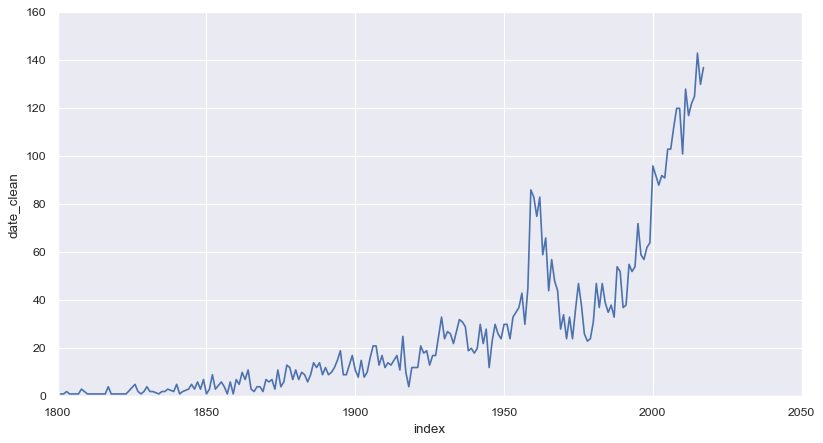

In [1767]:
attack_series = pd.DatetimeIndex(df['date_clean']).year.value_counts().sort_index().reset_index()

sns.lineplot(data=attack_series, x="index", y="date_clean");



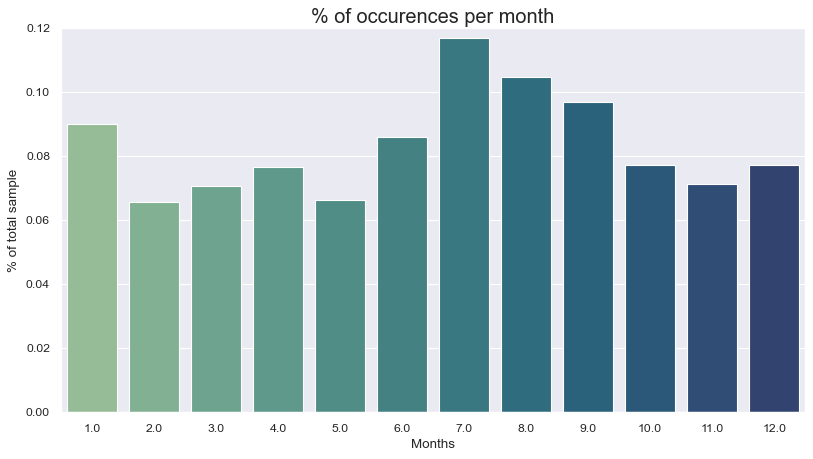

In [1768]:
attack_series = pd.DatetimeIndex(df['date_clean']).month.value_counts(normalize=True).sort_index().reset_index()
fig, ax = plt.subplots()
sns.barplot(data=attack_series, x="index", y="date_clean" , palette="crest")
plt.title("% of occurences per month", size=18)
plt.xlabel('Months')
plt.ylabel('% of total sample')
plt.show()




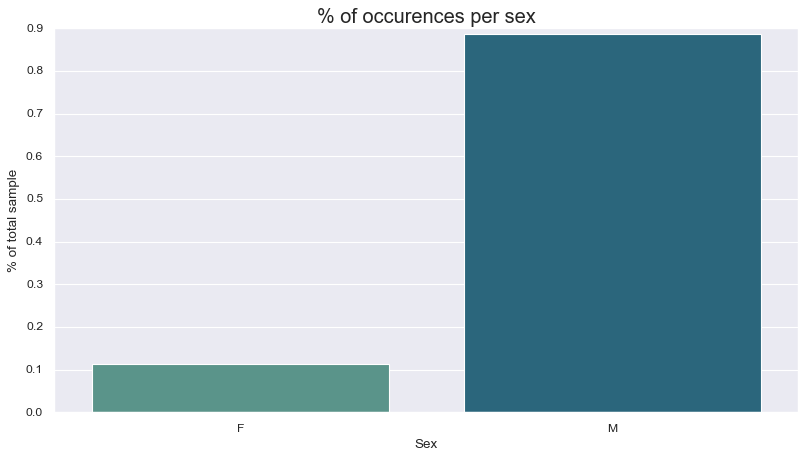

In [1769]:
attack_series = df["Sex "].value_counts(normalize=True).sort_index().reset_index()
fig, ax = plt.subplots()
sns.barplot(data=attack_series, x="index", y="Sex " , palette="crest")
plt.title("% of occurences per sex", size=18)
plt.xlabel('Sex')
plt.ylabel('% of total sample')
plt.show()

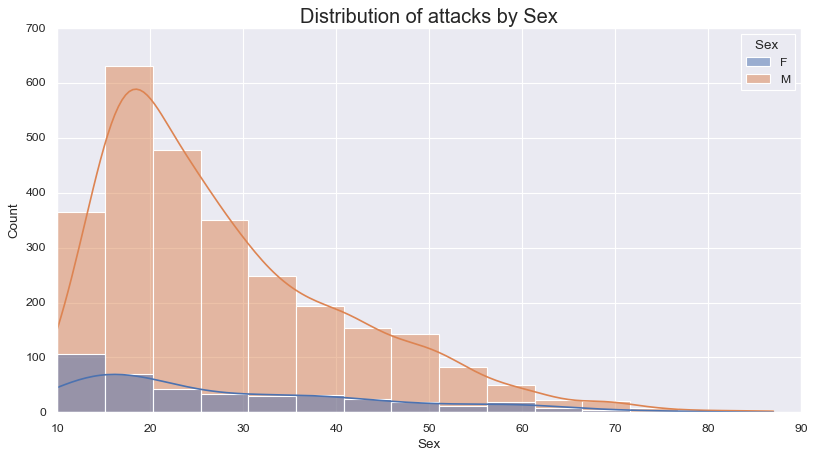

In [1774]:
sns.histplot(data=df, x="Age_clean", bins = 15 , hue="Sex ", kde=True)
plt.title("Distribution of attacks by Sex", size=18)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


In [1777]:
# The deadliest shark attacks during nightime, surfers are the most affected





,index,Time_clean
0,A.M.,0.389945
1,P.M.,0.610055


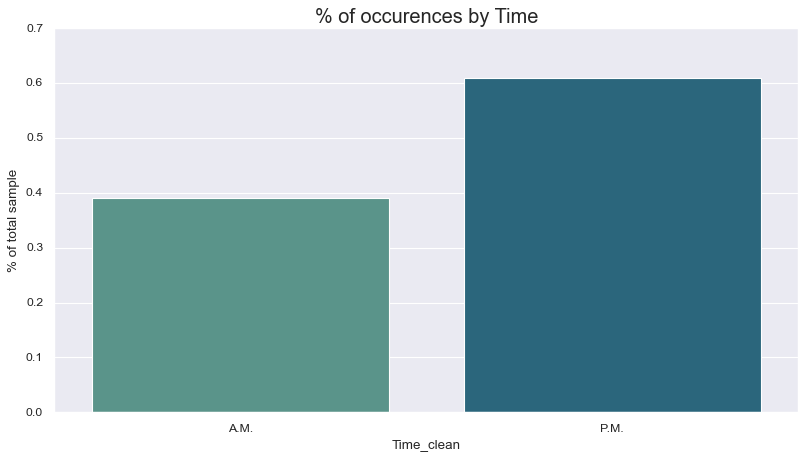

In [1778]:
time_day = df["Time_clean"].value_counts(normalize=True).sort_index().reset_index()
fig, ax = plt.subplots()
sns.barplot(data=time_day, x="index", y="Time_clean" , palette="crest")
plt.title("% of occurences by Time", size=18)
plt.xlabel('Time_clean')
plt.ylabel('% of total sample')
plt.show()